In [2]:
import numpy as np
import scipy 
import os
import matplotlib as mlp
import matplotlib.pyplot as plt 



x_l = 0
x_r = 1
y_l,y_r = x_l,x_r
def read(stderr_file):
    with open(stderr_file, "r") as err:
        stderr_content = err.read()
        # 在这里对 stderr_content 进行处理
        sss = stderr_content.split('\n')[3:-2]
        results = {'time': [],'iteration': [],'value': []}
        for line in sss:
            parts = line.strip().split()
            time = float(parts[1])
            iteration = int(parts[-2])
            value = float(parts[-1])
            results['time'].append(time)
            results['iteration'].append(1+iteration)
            results['value'].append(value)
    return results
def draw(p,N,T=1):
    result_file = f'./Order_{p}_Mesh_{N}/solution/T_{T}_N_{N}.txt'
    # rorder_file = f'./stdout_Diric4_%d_%d_1E8.txt'%(p,N)
    data = np.loadtxt(result_file)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
    uh,vh,wh,eh = uh/rh, vh/rh, wh/rh, eh/rh
    # idx = np.argsort(x)
    # x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = \
    #     (val[idx] for val in (x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es))

    ph = 0.4*rh*(eh-0.5*uh**2-0.5*vh**2-0.5*wh**2)
    plt.figure(figsize=(7,3.2),dpi=200)

    plt.subplot(1,2,1)
    plt.tripcolor(x,y,rh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$\rho_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(1,2,2)
    plt.tripcolor(x,y,(uh**2+vh**2+wh**2)**0.5,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$\|u_h\|$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    # plt.subplot(1,3,3)
    # plt.tripcolor(x,y,ph,cmap='jet')
    # plt.colorbar()
    # plt.xticks(np.linspace(x_l,x_r,6))
    # plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    # plt.yticks(np.linspace(y_l,y_r,6))
    # plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    # plt.grid(which='both')
    # plt.title(r'$p_h$')
    # plt.xlabel(r'$x$')
    # plt.ylabel(r'$y$')

    # plt.suptitle(r'Error of Density, $\|\rho_h-\rho\|/\|\rho\|$=%.2e'%(np.linalg.norm(rh-rs)/np.linalg.norm(rs)))
    plt.tight_layout()
    plt.show()

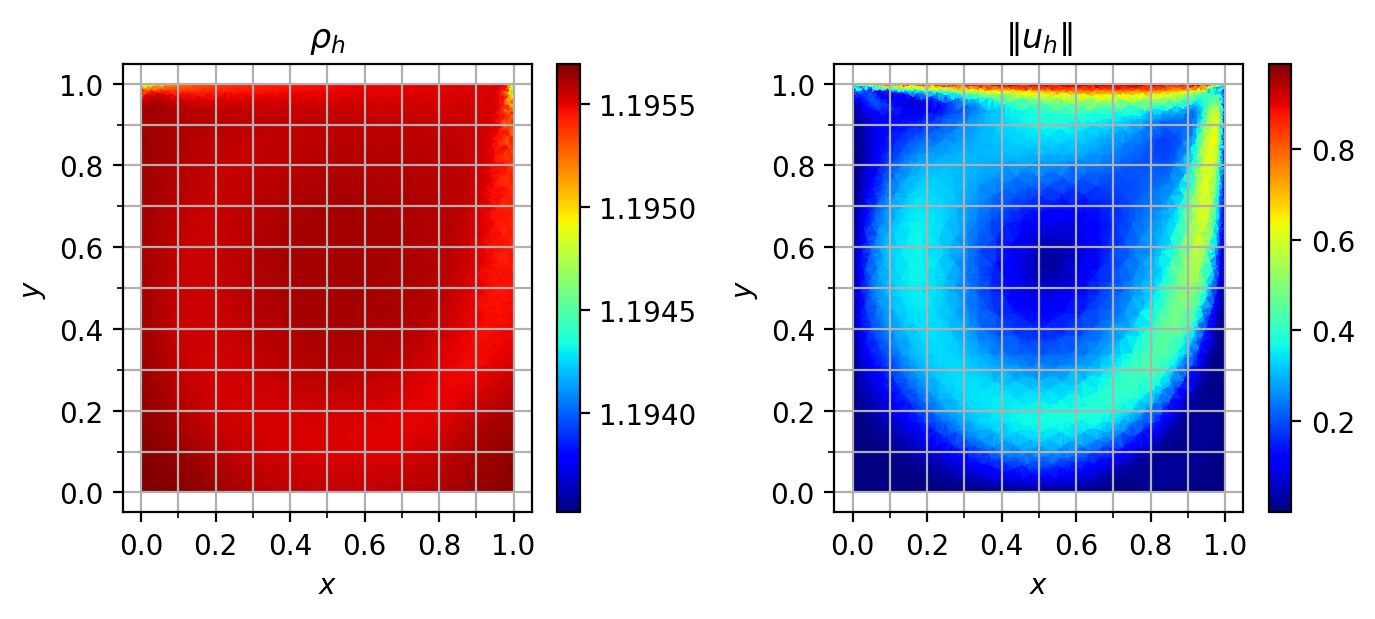

In [11]:
draw(2,10,95)

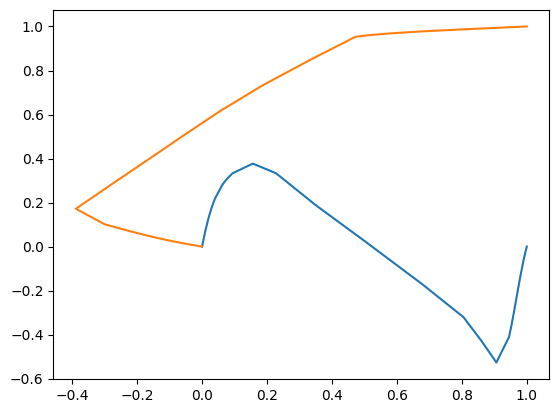

In [13]:
VXY = np.array([
    [0.0000, 0.05,      0.1,       0.5,        0.9,        0.99],
    [1.0000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000],
    [0.9950, 0.0008908, 0.0028794, -0.0291290, -0.2483258, -0.5315738],
    [0.9900, 0.0017567, 0.0054397, -0.0617528, -0.4446772, -0.3689984],
    [0.9800, 0.0033516, 0.0096860, -0.1359277, -0.6574629, -0.1251260],
    [0.9700, 0.0047034, 0.0128891, -0.2178657, -0.6607602, -0.0621618],
    [0.9688, 0.0048476, 0.0132096, -0.2279225, -0.6522928, -0.0582317],
    [0.9609, 0.0056994, 0.0150048, -0.2936869, -0.5768725, -0.0403150],
    [0.9531, 0.0063790, 0.0162754, -0.3553213, -0.4952124, -0.0302091],
    [0.9453, 0.0069088, 0.0170894, -0.4103754, -0.4231177, -0.0237116],
    [0.9063, 0.0077099, 0.0152532, -0.5264392, -0.2074994, -0.0095384],
    [0.8594, 0.0051011, 0.0014971, -0.4264545, -0.1045164, -0.0039896],
    [0.8047, -0.0033125, -0.0276588, -0.3202137, -0.0597701, -0.0017567],
    [0.6800, -0.0270199, -0.0827502, -0.1730887, -0.0193429, -0.0004456],
    [0.5000, 0.0001947, -0.0029492, 0.0257995, 0.0403155, 0.0012549],
    [0.3500, 0.0201600, 0.0636637, 0.1882246, 0.1106086, 0.0037809],
    [0.2344, 0.0112680, 0.0494267, 0.3253592, 0.1586062, 0.0056093],
    [0.2266, 0.0104883, 0.0469480, 0.3339924, 0.1602194, 0.0057075],
    [0.1563, 0.0043219, 0.0239565, 0.3769189, 0.1553913, 0.0071528],
    [0.0938, -0.0004455, 0.0058905, 0.3330442, 0.1155853, 0.0139622],
    [0.0781, -0.0014974, 0.0020380, 0.3099097, 0.1012963, 0.0188190],
    [0.0703, -0.0019435, 0.0003324, 0.2962703, 0.0937457, 0.0223919],
    [0.0625, -0.0023149, -0.0011868, 0.2807056, 0.0858977, 0.0271780],
    [0.0400, -0.0027685, -0.0040998, 0.2189314, 0.0609957, 0.0551375],
    [0.0300, -0.0025695, -0.0044352, 0.1796062, 0.0481541, 0.0836787],
    [0.0200, -0.0020601, -0.0039799, 0.1306210, 0.0336001, 0.1394213],
    [0.0100, -0.0012086, -0.0025656, 0.0709203, 0.0172233, 0.2441510],
    [0.0000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000]
])

UXY = np.array([
    [0.0000,  0.05,      0.1 ,     0.5,        0.9 ,        0.95],
    [1.0000, 1.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000],
    [0.9900, 0.3065653, 0.4887094, 0.8489396, 0.7776734, 0.6484320],
    [0.9800, -0.0005934, 0.1589376, 0.7070189, 0.6278671, 0.4540469],
    [0.9766, -0.0463677, 0.0877266, 0.6644227, 0.5858239, 0.4050784],
    [0.9688, -0.0963229, -0.0179216, 0.5808359, 0.5012384, 0.3138397],
    [0.9609, -0.1069008, -0.0685061, 0.5169277, 0.4290510, 0.2435656],
    [0.9531, -0.1011555, -0.0861188, 0.4723329, 0.3685037, 0.1898196],
    [0.8516, 0.0021425, 0.0275091, 0.3372212, 0.0595013, -0.0235823],
    [0.7344, 0.0225256, 0.0682270, 0.1886747, -0.0072932, -0.0423034],
    [0.6172, 0.0208341, 0.0429384, 0.0570178, -0.0595876, -0.0535559],
    [0.5000, -0.0006440, -0.0137569, -0.0620561, -0.1283646, -0.0633121],
    [0.4531, -0.0113844, -0.0381231, -0.1081999, -0.1514129, -0.0588011],
    [0.2813, -0.0297568, -0.0836295, -0.2803696, -0.0800951, -0.0130228],
    [0.1719, -0.0126154, -0.0437264, -0.3885690, -0.0145998, -0.0008423],
    [0.1016, -0.0009820, -0.0100382, -0.3004561, 0.0102124, 0.0053608],
    [0.0703, 0.0019072, -0.0000785, -0.2228955, 0.0171827, 0.0069668],
    [0.0625, 0.0023343, 0.0016359, -0.2023300, 0.0178619, 0.0069736],
    [0.0547, 0.0026292, 0.0029984, -0.1812881, 0.0179832, 0.0067790],
    [0.0400, 0.0027887, 0.0045171, -0.1396601, 0.0165065, 0.0058251],
    [0.0300, 0.0025658, 0.0046801, -0.1090870, 0.0141215, 0.0047386],
    [0.0200, 0.0020422, 0.0040486, -0.0759628, 0.0105719, 0.0033397],
    [0.0100, 0.0011932, 0.0025269, -0.0397486, 0.0058570, 0.0017139],
    [0.0000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000]
])

# Extract x and y coordinates
VX = VXY[1:, 0]
VY = VXY[0, 1:]
V  = VXY[1:,1:]
UY = UXY[1:, 0]
UX = UXY[0, 1:]
U  = UXY[1:,1:]

plt.plot(VX,V[:,VY==0.5])
plt.plot(U[:,UX==0.5],UY)



p=2
N=10
T=95
result_file = f'./Order_{p}_Mesh_{N}/solution/T_{T}_N_{N}.txt'
data = np.loadtxt(result_file)
x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
uh,vh,wh,eh = uh/rh, vh/rh, wh/rh, eh/rh

In [14]:
from scipy.interpolate import RBFInterpolator

z_target = 0.5 * (z.min() + z.max())

points_V = np.stack((x, y, z),1) 
target_y_V = 0.5
target_points_V = np.stack((VX,np.full_like(VX, target_y_V),np.full_like(VX, z_target)),1)
# uh_interp_V = scipy.interpolate.griddata(points_V, uh, target_points_V, method='linear')
# vh_interp_V = scipy.interpolate.griddata(points_V, vh, target_points_V, method='linear')

rbf_uh = RBFInterpolator(points_V, uh, kernel='thin_plate_spline')
uh_interp_V = rbf_uh(target_points_V)
rbf_vh = RBFInterpolator(points_V, vh, kernel='thin_plate_spline')
vh_interp_V = rbf_vh(target_points_V)


points_U = np.stack((x, y, z),1)
target_x_U = 0.5
target_points_U = np.stack((np.full_like(UY, target_x_U),UY,np.full_like(UY, z_target)),1)
# uh_interp_U = scipy.interpolate.griddata(points_U, uh, target_points_U, method='linear')
# vh_interp_U = scipy.interpolate.griddata(points_U, vh, target_points_U, method='linear')
rbf_uh = RBFInterpolator(points_U, uh, kernel='thin_plate_spline')
uh_interp_U = rbf_uh(target_points_U)
rbf_vh = RBFInterpolator(points_U, vh, kernel='thin_plate_spline')
vh_interp_U = rbf_vh(target_points_U)

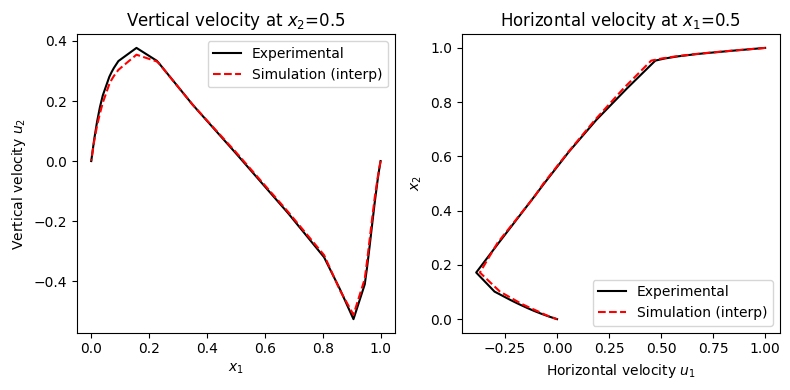

In [16]:
# --- 6. 绘制对比图 ---
plt.figure(figsize=(8, 4))

# (A) 垂直速度对比 (v-component @ y=0.5)
plt.subplot(1, 2, 1)
plt.plot(VX, V[:, VY==0.5].flatten(), 'k-', label='Experimental')
plt.plot(VX, vh_interp_V, 'r--', label='Simulation (interp)')
plt.xlabel('$x_1$')
plt.ylabel('Vertical velocity $u_2$')
plt.title(f'Vertical velocity at $x_2$={target_y_V}')
plt.legend()

# (B) 水平速度对比 (u-component @ x=0.5)
plt.subplot(1, 2, 2)
plt.plot(U[:, UX==0.5].flatten(), UY, 'k-', label='Experimental')
plt.plot(uh_interp_U, UY, 'r--', label='Simulation (interp)')
plt.xlabel('Horizontal velocity $u_1$')
plt.ylabel('$x_2$')
plt.title(f'Horizontal velocity at $x_1$={target_x_U}')
plt.legend()

plt.tight_layout()
plt.show()